<a href="https://colab.research.google.com/github/matheusdiaas99/data_portfolio/blob/main/Copy_of_An%C3%A1lise_Gr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Preparo de Dados




In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
from matplotlib.ticker import FuncFormatter


In [42]:
df_data = pd.read_csv('graficos_fev24.csv')

df_data.dropna(axis=0, how='all', inplace=True)
df_data.dropna(axis=1, how='all', inplace=True)

df_data

,Indicador,Filial,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,2023,Jan-24,Feb-24
0,receita_liquida,SP,17249570,14881775,17914294,14395248,18351120,17010254,17899328,19144121,17085740,17921842,16066402,13974455,201894148,19229934,17524116
1,receita_liquida,GO,4198995,3686037,4663988,3752729,4592659,4413824,4235081,5142157,4637992,4311274,3828904,3174064,50637703,4782455,4279563
2,receita_liquida,MG,6257748,5616610,6765482,5374578,6856962,6026331,6554004,6554832,5865139,6022641,5532555,4891440,72318322,6992459,6008601
3,receita_liquida,RJ,3834999,3296985,4333445,3397905,4104281,3648075,3845083,4175429,3548947,3612570,3513644,3441919,44753281,4162604,3703702
4,receita_liquida,PR,3428472,2998843,3496441,2905616,3380083,3109350,3082216,3432695,2846121,2831134,2468494,1982870,35962334,2539037,2459185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,margem_lucro_ajust,SJOSE,8.2%,6.5%,7.5%,7.2%,7.9%,6.8%,7.6%,7.4%,6.7%,7.1%,6.7%,6.0%,7.2%,7.0%,66.0%
252,lucro_liquido_ajust,CASCAVEL-PR,-10248,-1268,-14782,-9172,12579,8608,-15875,25967,30995,13984,12242,239,53269,27838,91709
253,margem_lucro_ajust,CASCAVEL-PR,-4.3%,-0.5%,-3.4%,-2.5%,2.2%,1.4%,-2.2%,3.2%,4.1%,1.8%,1.5%,0.0%,0.8%,2.8%,66.1%
254,lucro_liquido_ajust,CUIABA-MT,0,-78532,7657,56194,5788,30472,63109,86651,102235,57376,3379,9615,343944,14916,19205


In [43]:
df_data.columns

Index(['Indicador', 'Filial', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23',
       'Jun-23', 'Jul-23', 'Aug-23', 'Sep-23', 'Oct-23', 'Nov-23', 'Dec-23',
       '2023', 'Jan-24', 'Feb-24'],
      dtype='object')

In [44]:
#Selecionar colunas que continuam como texto
colunas_nao_converter = ["Indicador", "Filial"]


# Ajustar formato das colunas numéricas (tirar % e deixar como float)
for coluna in df_data:
  if coluna not in colunas_nao_converter:
    df_data[coluna] = df_data[coluna].apply(lambda x: pd.to_numeric(x.rstrip('%').replace('(', '-').replace(')', '')) / 100 if isinstance(x, str) and ('%' in x or '(' in x) else x)
    df_data[coluna] = pd.to_numeric(df_data[coluna], errors='coerce')

df_data.dtypes

Indicador     object
Filial        object
Jan-23       float64
Feb-23       float64
Mar-23       float64
Apr-23       float64
May-23       float64
Jun-23       float64
Jul-23       float64
Aug-23       float64
Sep-23       float64
Oct-23       float64
Nov-23       float64
Dec-23       float64
2023         float64
Jan-24       float64
Feb-24       float64
dtype: object

In [62]:
#Renomeando Indicadores
df_data = df_data.replace({'receita_liquida':'receita',
                           'Funcionários':'funcionarios',
                           'Margem_EBITDA':'margem_ebitda',
                           'Funcionários_Receita': 'funcionarios_receita',
                           'CMV': 'cmv',
                           'CMV_Receita': 'cmv_receita',
                           'Margem_EBIT': 'margem_ebit',
                           'Lucro_Liquido_Receita': 'margem_lucro',
                           'depesas_operacionais': 'despesas_operacionais'})


df_data

,Indicador,Filial,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,...,Dec-23,2023,Jan-24,Feb-24,1T-23(Média),2T-23(Média),3T-23(Média),4T-23(Média),1T-24(Média),Crescimento_4T
0,receita,SP,1.724957e+07,1.488178e+07,1.791429e+07,1.439525e+07,1.835112e+07,1.701025e+07,1.789933e+07,1.914412e+07,...,1.397446e+07,2.018941e+08,1.922993e+07,1.752412e+07,1.668188e+07,1.658554e+07,1.804306e+07,1.598757e+07,1.837702e+07,0.101616
1,receita,GO,4.198995e+06,3.686037e+06,4.663988e+06,3.752729e+06,4.592659e+06,4.413824e+06,4.235081e+06,5.142157e+06,...,3.174064e+06,5.063770e+07,4.782455e+06,4.279563e+06,4.183007e+06,4.253071e+06,4.671743e+06,3.771414e+06,4.531009e+06,0.083194
2,receita,MG,6.257748e+06,5.616610e+06,6.765482e+06,5.374578e+06,6.856962e+06,6.026331e+06,6.554004e+06,6.554832e+06,...,4.891440e+06,7.231832e+07,6.992459e+06,6.008601e+06,6.213280e+06,6.085957e+06,6.324658e+06,5.482212e+06,6.500530e+06,0.046232
3,receita,RJ,3.834999e+06,3.296985e+06,4.333445e+06,3.397905e+06,4.104281e+06,3.648075e+06,3.845083e+06,4.175429e+06,...,3.441919e+06,4.475328e+07,4.162604e+06,3.703702e+06,3.821810e+06,3.716754e+06,3.856486e+06,3.522711e+06,3.933153e+06,0.029134
4,receita,PR,3.428472e+06,2.998843e+06,3.496441e+06,2.905616e+06,3.380083e+06,3.109350e+06,3.082216e+06,3.432695e+06,...,1.982870e+06,3.596233e+07,2.539037e+06,2.459185e+06,3.307919e+06,3.131683e+06,3.120344e+06,2.427499e+06,2.499111e+06,-0.244507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,margem_lucro_ajust,SJOSE,8.200000e-02,6.500000e-02,7.500000e-02,7.200000e-02,7.900000e-02,6.800000e-02,7.600000e-02,7.400000e-02,...,6.000000e-02,7.200000e-02,7.000000e-02,6.600000e-01,7.400000e-02,7.300000e-02,7.233333e-02,6.600000e-02,3.650000e-01,3.932432
252,lucro_liquido_ajust,CASCAVEL-PR,-1.024800e+04,-1.268000e+03,-1.478200e+04,-9.172000e+03,1.257900e+04,8.608000e+03,-1.587500e+04,2.596700e+04,...,2.390000e+02,5.326900e+04,2.783800e+04,9.170900e+04,-8.766000e+03,4.005000e+03,1.369567e+04,8.821667e+03,5.977350e+04,7.818789
253,margem_lucro_ajust,CASCAVEL-PR,-4.300000e-02,-5.000000e-03,-3.400000e-02,-2.500000e-02,2.200000e-02,1.400000e-02,-2.200000e-02,3.200000e-02,...,0.000000e+00,8.000000e-03,2.800000e-02,6.610000e-01,-2.733333e-02,3.666667e-03,1.700000e-02,1.100000e-02,3.445000e-01,13.603659
254,lucro_liquido_ajust,CUIABA-MT,0.000000e+00,-7.853200e+04,7.657000e+03,5.619400e+04,5.788000e+03,3.047200e+04,6.310900e+04,8.665100e+04,...,9.615000e+03,3.439440e+05,1.491600e+04,1.920500e+04,-2.362500e+04,3.081800e+04,8.399833e+04,2.345667e+04,1.706050e+04,1.722138


# Drop em colunas necessárias

In [26]:
#df_data = df_data.drop("2023", axis=1)

# Definir períodos de análise e calcular novas colunas

In [46]:
# Adicionar Mar-24 quando pronto
trimestres = {
    "1T-23": ["Jan-23", "Feb-23", "Mar-23"],
    "2T-23": ["Apr-23", "May-23", "Jun-23"],
    "3T-23": ["Jul-23", "Aug-23", "Sep-23"],
    "4T-23": ["Oct-23", "Nov-23", "Dec-23"],
    "1T-24": ["Jan-24", "Feb-24"],
}

for trimestre, meses in trimestres.items():
    df_data[f"{trimestre}(Média)"] = pd.to_numeric(df_data[meses].mean(axis=1))

df_data["Crescimento_4T"] = df_data["1T-24(Média)"]/df_data["1T-23(Média)"]-1
condition = (df_data["1T-23(Média)"] < 0) & (df_data["Crescimento_4T"] < 0)
df_data.loc[condition, "Crescimento_4T"] = (df_data.loc[condition, "Crescimento_4T"]) *-1
condition2 = (df_data["1T-23(Média)"] < 0) & (df_data["Crescimento_4T"] > 0)
df_data.loc[condition2, "Crescimento_4T"] = abs(df_data.loc[condition, "Crescimento_4T"])

#df_filtrado = df_data.loc[df_data['Indicador'] == 'EBIT']
#df_filtrado


# Receita

Indicador          receita                                         \
Filial                  SP            GO         MG            RJ   
1T-23(Média)  1.668188e+07  4.183007e+06  6213280.0  3.821810e+06   
1T-24(Média)  1.837702e+07  4.531009e+06  6500530.0  3.933153e+06   

Indicador                                                          \
Filial                  PR            CP            SC         RP   
1T-23(Média)  3.307919e+06  1.896158e+06  1.653542e+06  2075454.0   
1T-24(Média)  2.499111e+06  1.976935e+06  1.744541e+06  2457318.5   

Indicador                                                             \
Filial                  MS            TO         SJOSE   CASCAVEL-PR   
1T-23(Média)  4.448371e+06  2.940488e+06  1.725920e+06  3.035007e+05   
1T-24(Média)  4.813006e+06  3.008248e+06  2.350214e+06  1.017493e+06   

Indicador                
Filial        CUIABA-MT  
1T-23(Média)        0.0  
1T-24(Média)  1496265.5  
Indicador        receita                             

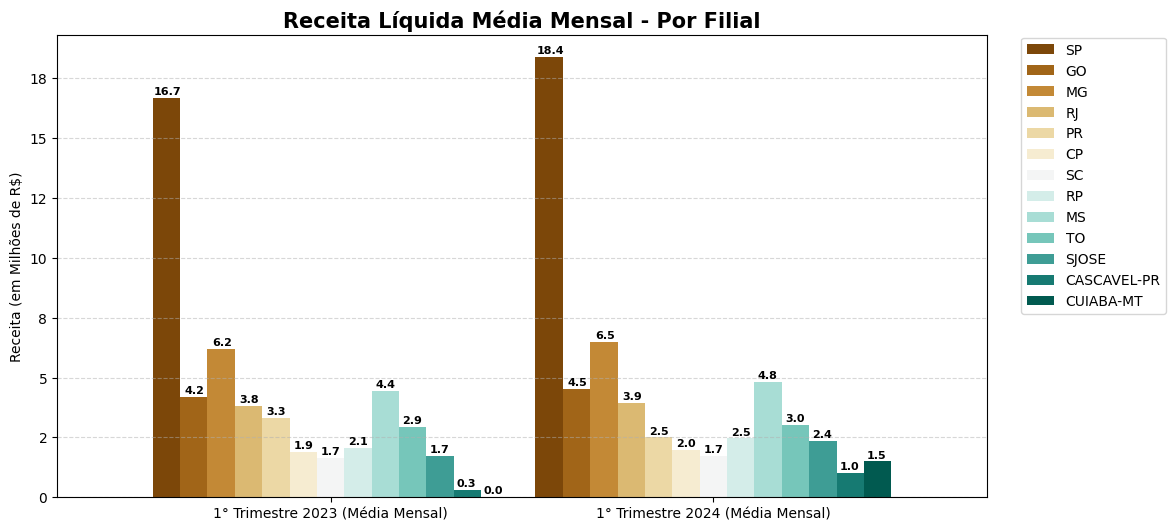

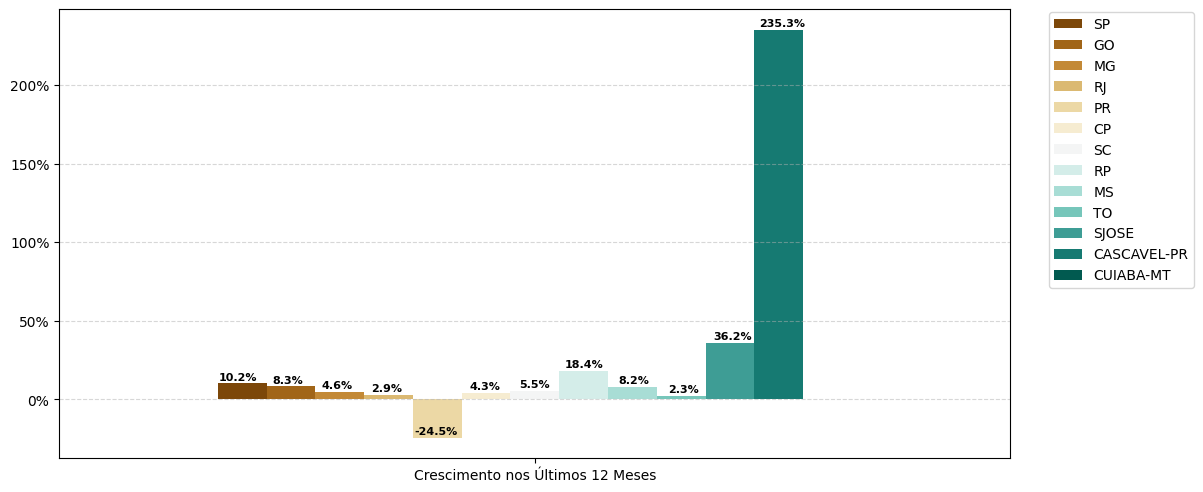

In [52]:
var1= "receita"
rotulo_y = 'Receita (em Milhões de R$)'
titulo = 'Receita Líquida Média Mensal - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y/1000000):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()




# CMV

Indicador              cmv                                                 \
Filial                  SP            GO         MG         RJ         PR   
1T-23(Média)  1.331774e+07  3.287230e+06  4955396.0  2990553.0  2656141.0   
1T-24(Média)  1.490150e+07  3.649134e+06  5199793.5  3113062.0  1948073.5   

Indicador                                                                     \
Filial                  CP         SC         RP            MS            TO   
1T-23(Média)  1.508846e+06  1307633.0  1679321.0  3.527291e+06  2.172194e+06   
1T-24(Média)  1.607763e+06  1415370.5  2016894.5  3.794161e+06  2.290194e+06   

Indicador                                          
Filial            SJOSE    CASCAVEL-PR  CUIABA-MT  
1T-23(Média)  1362601.0  250914.666667   -40356.0  
1T-24(Média)  1883759.0  711131.000000  1202317.0  
Indicador            cmv                                                    \
Filial                SP        GO        MG        RJ        PR        CP   
Cresci

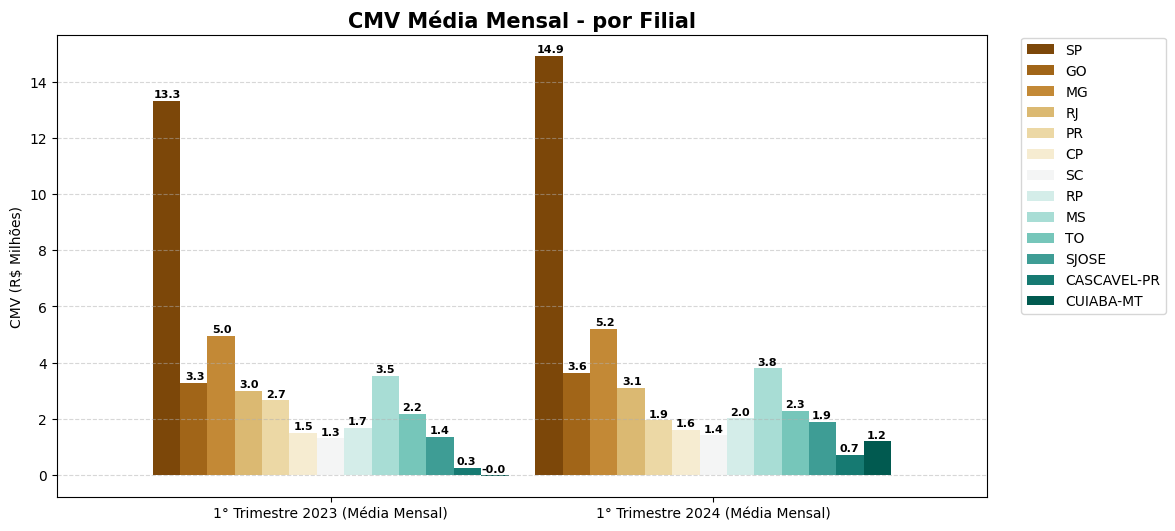

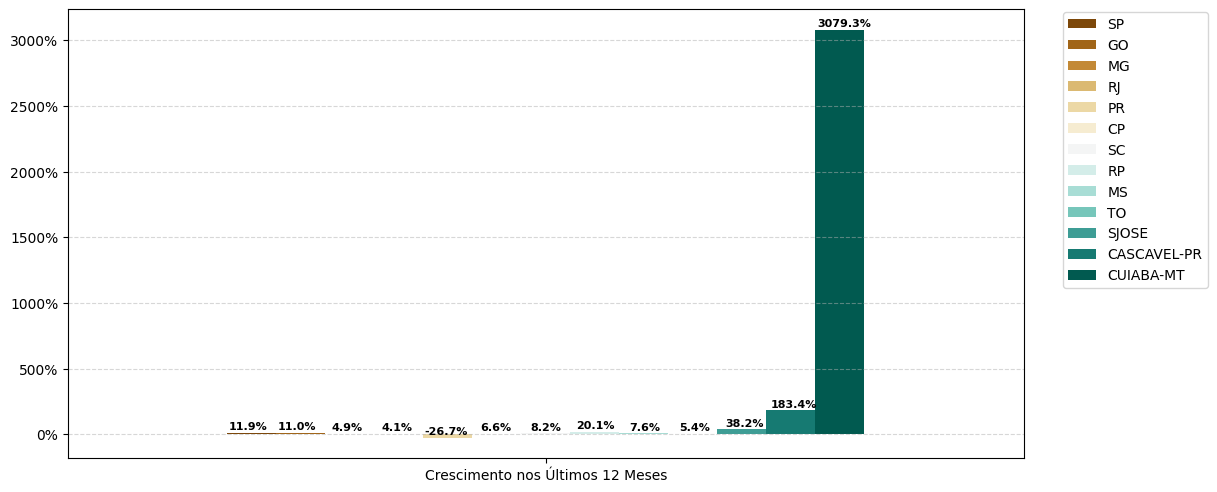

In [53]:
var1= "cmv"
rotulo_y = 'CMV (R$ Milhões)'
titulo = 'CMV Média Mensal - por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000000:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y/1000000):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()


#Margem CMV

Indicador    margem_cmv                                                    \
Filial               SP        GO        MG        RJ        PR        CP   
1T-23(Média)   0.798333  0.785667  0.797667  0.782667  0.803667  0.796333   
1T-24(Média)   0.810500  0.805000  0.799500  0.791000  0.779000  0.813000   

Indicador                                                                      
Filial            SC        RP     MS        TO   SJOSE CASCAVEL-PR CUIABA-MT  
1T-23(Média)  0.7900  0.809333  0.793  0.738667  0.7900    0.831667       NaN  
1T-24(Média)  0.8115  0.820500  0.787  0.761500  0.8015    0.700000    0.8035  
Indicador      margem_cmv                                                    \
Filial                 SP        GO        MG        RJ        PR        CP   
Crescimento_4T    0.01524  0.024608  0.002298  0.010647 -0.030693  0.020929   

Indicador                                                                     \
Filial                SC        RP        MS        T

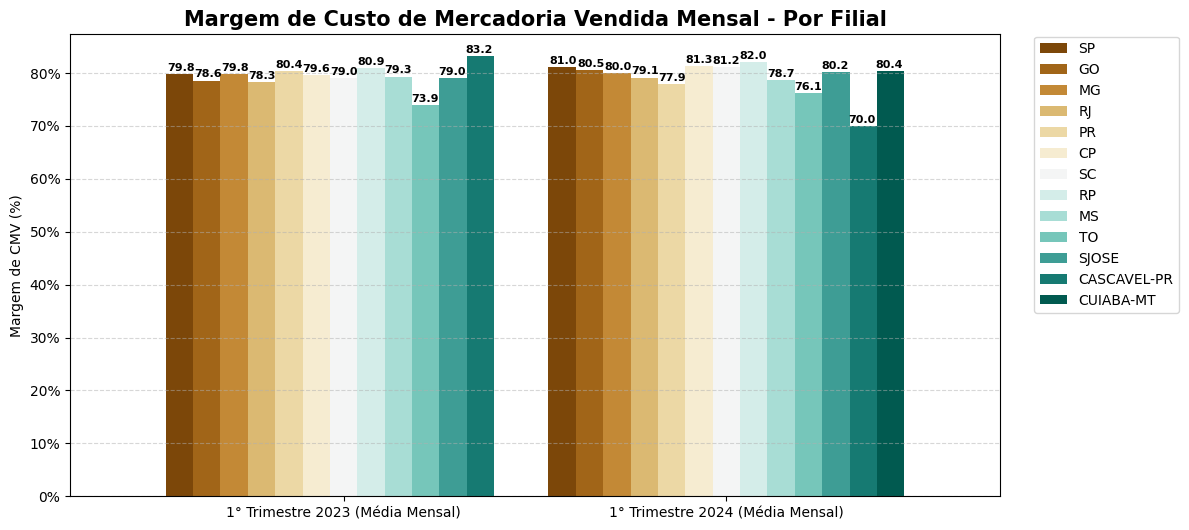

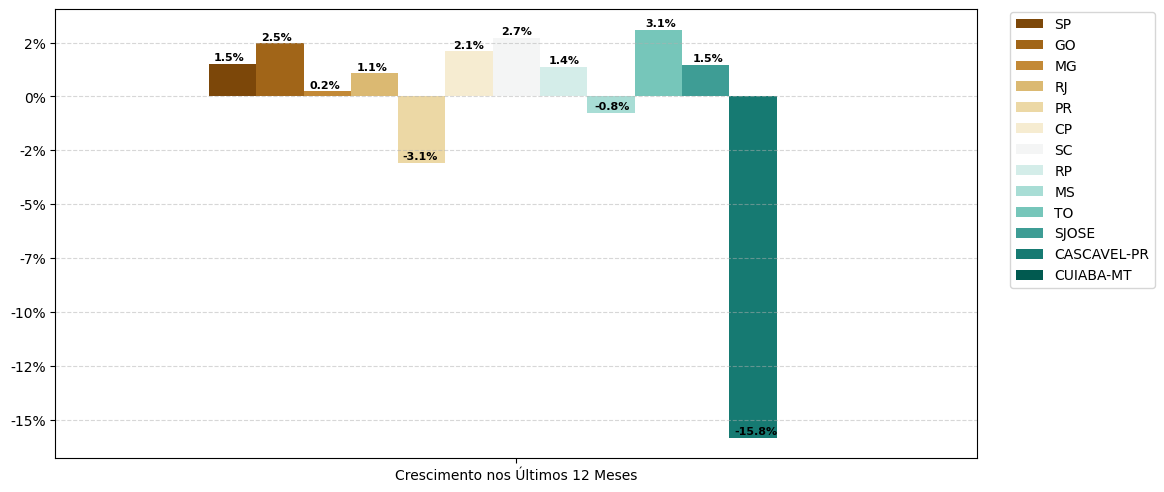

In [56]:
var1= "margem_cmv"
rotulo_y = 'Margem de CMV (%)'
titulo = 'Margem de Custo de Mercadoria Vendida Mensal - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y *100):.0f}%'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()

# Despesas Operacionais

Indicador    despesas_operacionais                                     \
Filial                          SP        GO        MG             RJ   
1T-23(Média)             2519498.0  188349.0  600756.0  507958.666667   
1T-24(Média)             2597601.5  539372.5  600583.0  467197.000000   

Indicador                                                                      \
Filial              PR             CP             SC        RP             MS   
1T-23(Média)  377084.0  270555.333333  301552.666667  250819.0  559069.666667   
1T-24(Média)  315489.5  243337.500000  344460.500000  263310.0  610544.000000   

Indicador                                                         
Filial                   TO          SJOSE CASCAVEL-PR CUIABA-MT  
1T-23(Média)  371680.666667  196912.333333    171458.0   99495.0  
1T-24(Média)  324137.500000  220584.000000    215974.0  268192.5  
Indicador      despesas_operacionais                                          \
Filial                            

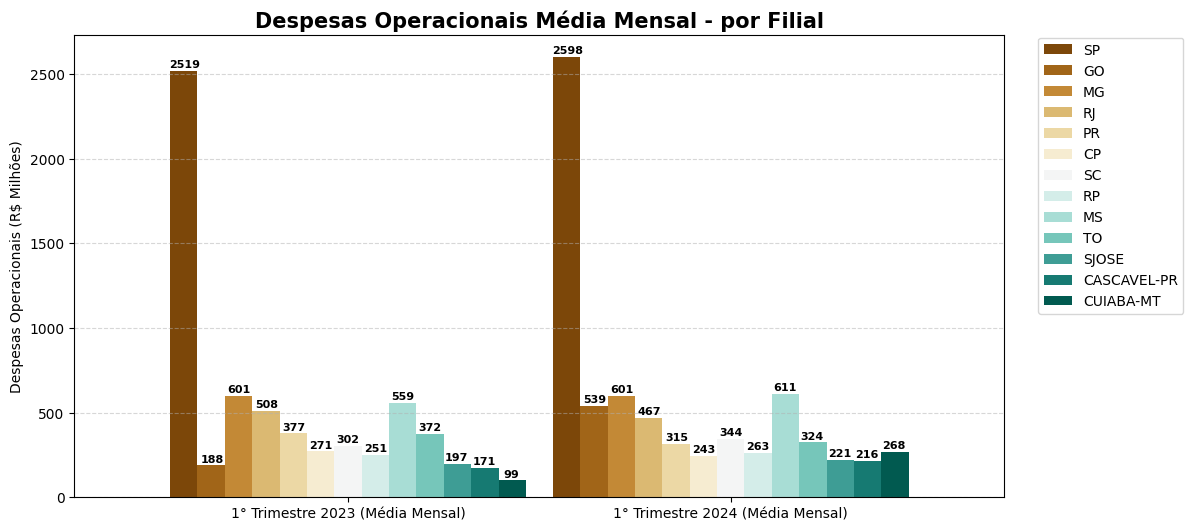

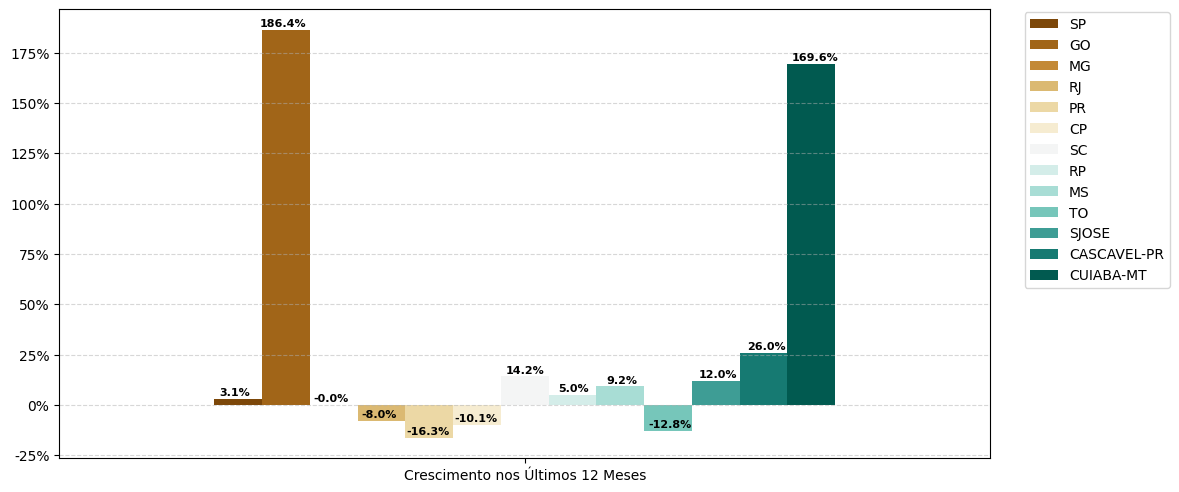

In [63]:
var1= "despesas_operacionais"
rotulo_y = 'Despesas Operacionais (R$ Milhões)'
titulo = 'Despesas Operacionais Média Mensal - por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y/1000):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()


#Margem de Despesas Operacionais

Indicador    despesas_operacionais_receita                             \
Filial                                  SP        GO     MG        RJ   
1T-23(Média)                      0.151667  0.054667  0.097  0.133667   
1T-24(Média)                      0.142000  0.119500  0.093  0.120000   

Indicador                                                                      \
Filial              PR      CP     SC        RP        MS        TO     SJOSE   
1T-23(Média)  0.114667  0.1440  0.183  0.122333  0.126333  0.126333  0.114333   
1T-24(Média)  0.126500  0.1225  0.198  0.108000  0.129000  0.107500  0.094000   

Indicador                           
Filial       CASCAVEL-PR CUIABA-MT  
1T-23(Média)      0.5870       NaN  
1T-24(Média)      0.2125    0.1795  
Indicador      despesas_operacionais_receita                                \
Filial                                    SP        GO        MG        RJ   
Crescimento_4T                     -0.063736  1.185976 -0.041237 -0.102244   


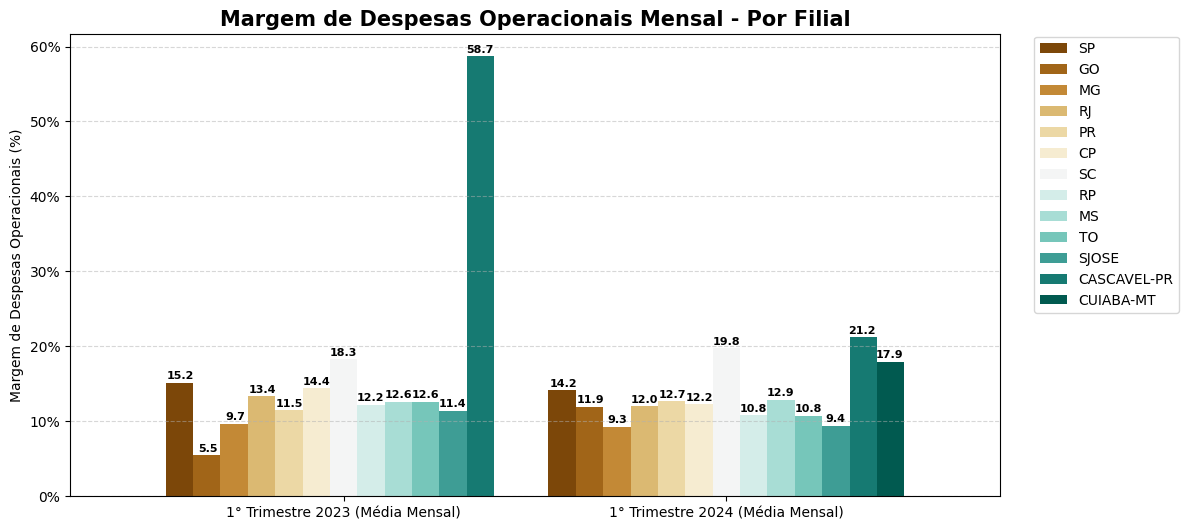

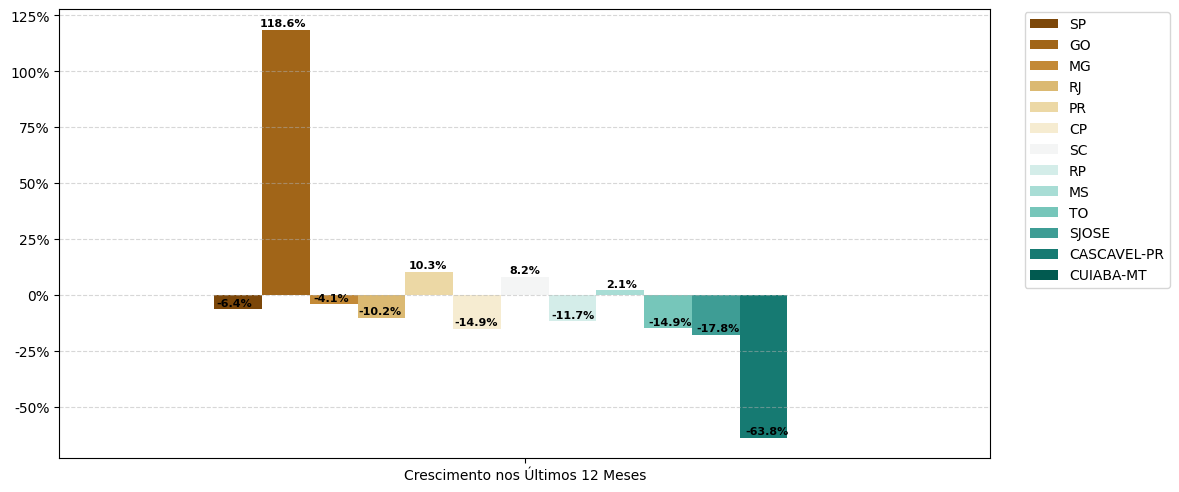

In [65]:
var1= "despesas_operacionais_receita"
rotulo_y = 'Margem de Despesas Operacionais (%)'
titulo = 'Margem de Despesas Operacionais Mensal - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y *100):.0f}%'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()

#EBITDA

Indicador           ebitda                                                    \
Filial                  SP             GO        MG             RJ        PR   
1T-23(Média)  1.114798e+06  336277.666667  628197.0  313081.333333  265424.0   
1T-24(Média)  1.105448e+06  322647.000000  650207.0  320218.000000  209222.0   

Indicador                                                                \
Filial                   CP            SC             RP             MS   
1T-23(Média)  113969.333333  41037.666667  139382.666667  354876.666667   
1T-24(Média)  121007.000000 -22917.500000  167503.000000  382011.500000   

Indicador                                                                
Filial                   TO          SJOSE    CASCAVEL-PR     CUIABA-MT  
1T-23(Média)  388231.666667  157753.666667 -116076.666667 -52060.333333  
1T-24(Média)  373887.000000  240744.500000   89266.000000  32426.500000  
Indicador         ebitda                                                    \
Fili

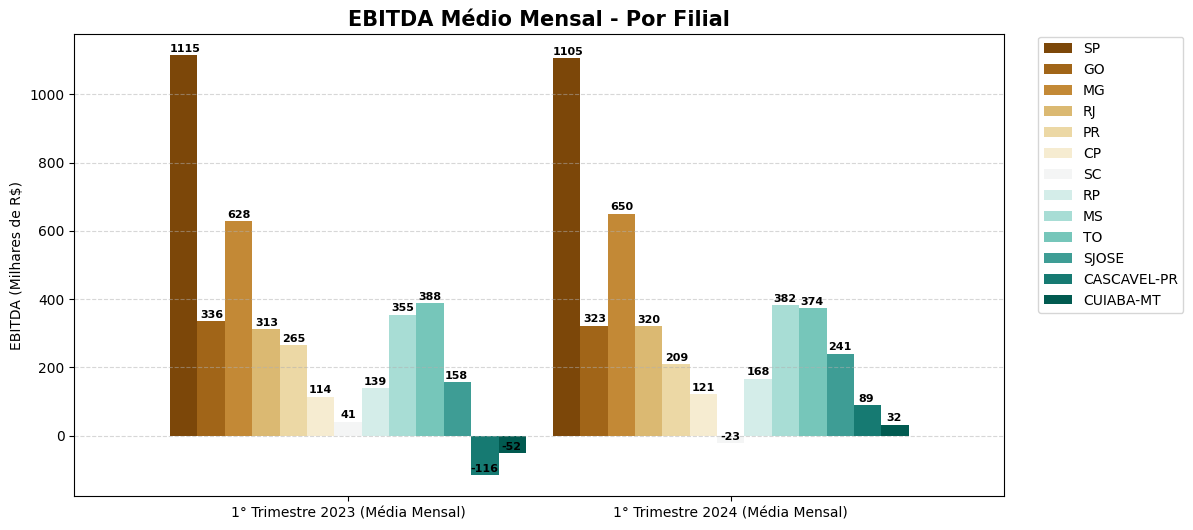

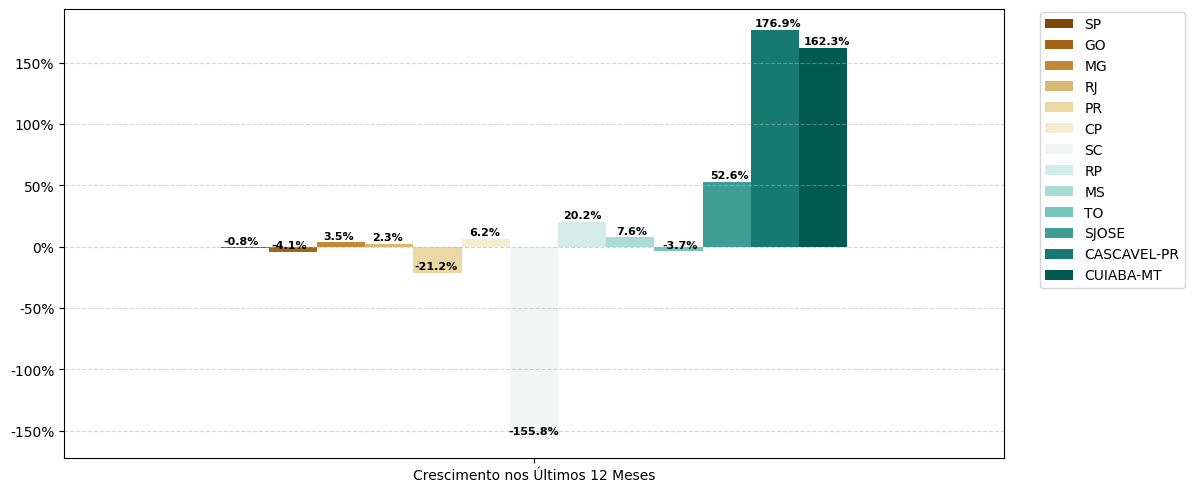

In [67]:
var1= "ebitda"
rotulo_y = 'EBITDA (Milhares de R$)'
titulo = 'EBITDA Médio Mensal - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y/1000):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()

#Margem EBITDA

Indicador    margem_ebitda                                                    \
Filial                  SP        GO        MG        RJ        PR        CP   
1T-23(Média)      0.066667  0.079667  0.100333  0.080667  0.079667  0.058667   
1T-24(Média)      0.060000  0.072000  0.100000  0.081000  0.084500  0.062000   

Indicador                                                                      
Filial              SC      RP        MS     TO   SJOSE CASCAVEL-PR CUIABA-MT  
1T-23(Média)  0.025333  0.0660  0.078667  0.132  0.0910   -0.409333       NaN  
1T-24(Média) -0.014000  0.0685  0.079000  0.124  0.1025    0.086500     0.022  
Indicador      margem_ebitda                                          \
Filial                    SP        GO        MG        RJ        PR   
Crescimento_4T          -0.1 -0.096234 -0.003322  0.004132  0.060669   

Indicador                                                                   \
Filial                CP        SC        RP        MS        TO

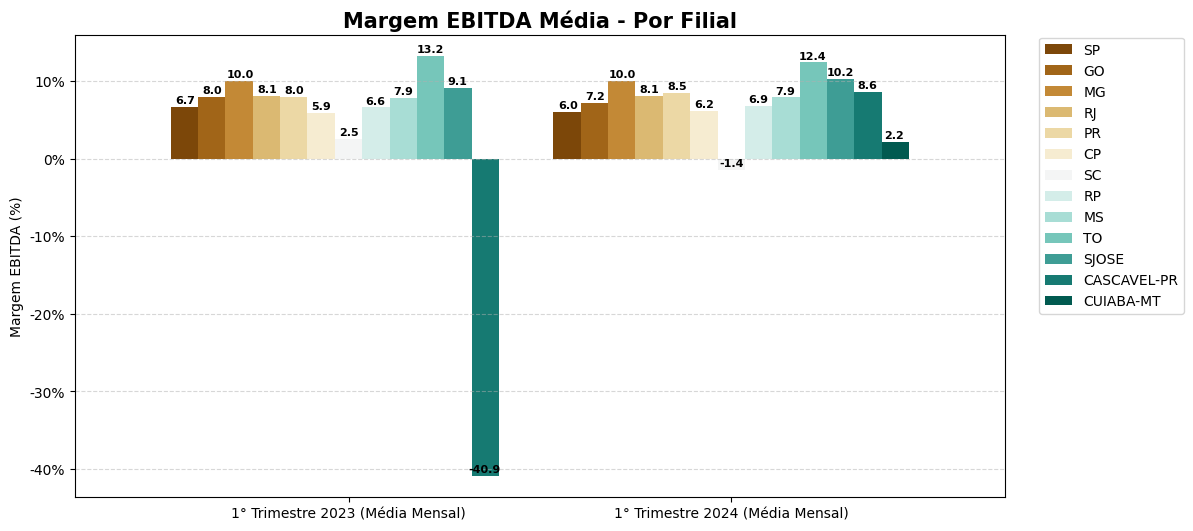

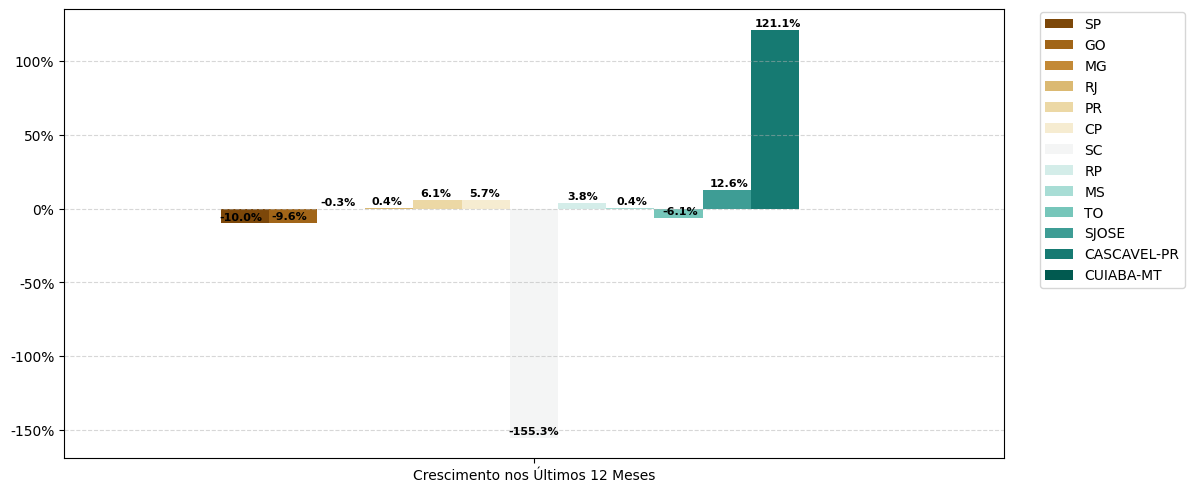

In [68]:
var1= "margem_ebitda"
rotulo_y = 'Margem EBITDA (%)'
titulo = 'Margem EBITDA Média - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y *100):.0f}%'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()

# EBIT

Indicador             ebit                                                    \
Filial                  SP             GO        MG             RJ        PR   
1T-23(Média)  1.078276e+06  334032.333333  624062.0  311810.666667  263156.0   
1T-24(Média)  1.065276e+06  320371.000000  646071.0  318937.500000  207736.0   

Indicador                                                                \
Filial                   CP            SC             RP             MS   
1T-23(Média)  113170.333333  40220.666667  137834.666667  346560.333333   
1T-24(Média)  120175.500000 -23740.500000  165955.500000  373666.500000   

Indicador                                                       
Filial              TO          SJOSE    CASCAVEL-PR CUIABA-MT  
1T-23(Média)  385898.0  156225.333333 -118871.666667  -59139.0  
1T-24(Média)  371528.0  239194.000000   85761.500000   10984.5  
Indicador           ebit                                                    \
Filial                SP        GO      

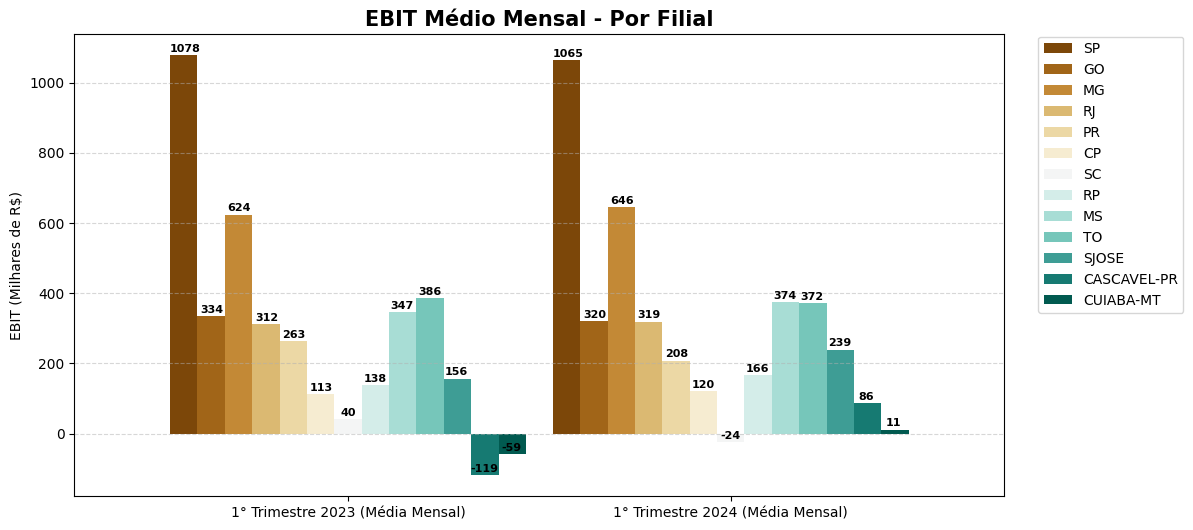

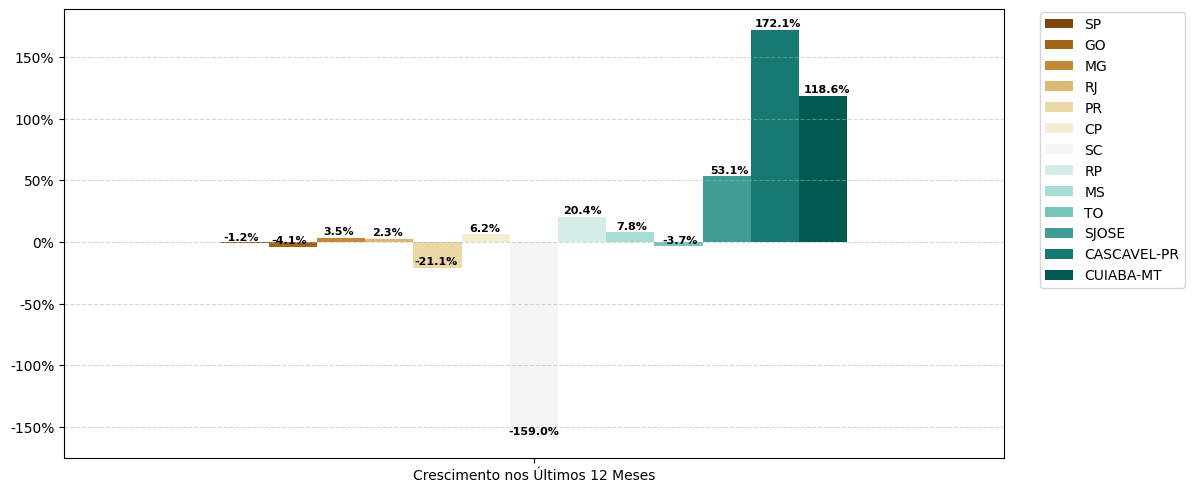

In [70]:
var1= "ebit"
rotulo_y = 'EBIT (Milhares de R$)'
titulo = 'EBIT Médio Mensal - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y/1000):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()



#Margem EBIT

Indicador    margem_ebit                                                    \
Filial                SP        GO        MG        RJ        PR        CP   
1T-23(Média)       0.064  0.079333  0.099333  0.080667  0.078667  0.057667   
1T-24(Média)       0.058  0.071000  0.100000  0.080500  0.083500  0.061000   

Indicador                                                                     
Filial              SC      RP     MS        TO  SJOSE CASCAVEL-PR CUIABA-MT  
1T-23(Média)  0.024667  0.0650  0.077  0.131333  0.090     -0.4190       NaN  
1T-24(Média) -0.014000  0.0675  0.077  0.124000  0.102      0.0835    0.0075  
Indicador      margem_ebit                                                    \
Filial                  SP        GO        MG        RJ        PR        CP   
Crescimento_4T    -0.09375 -0.105042  0.006711 -0.002066  0.061441  0.057803   

Indicador                                                                \
Filial                SC        RP   MS        TO     S

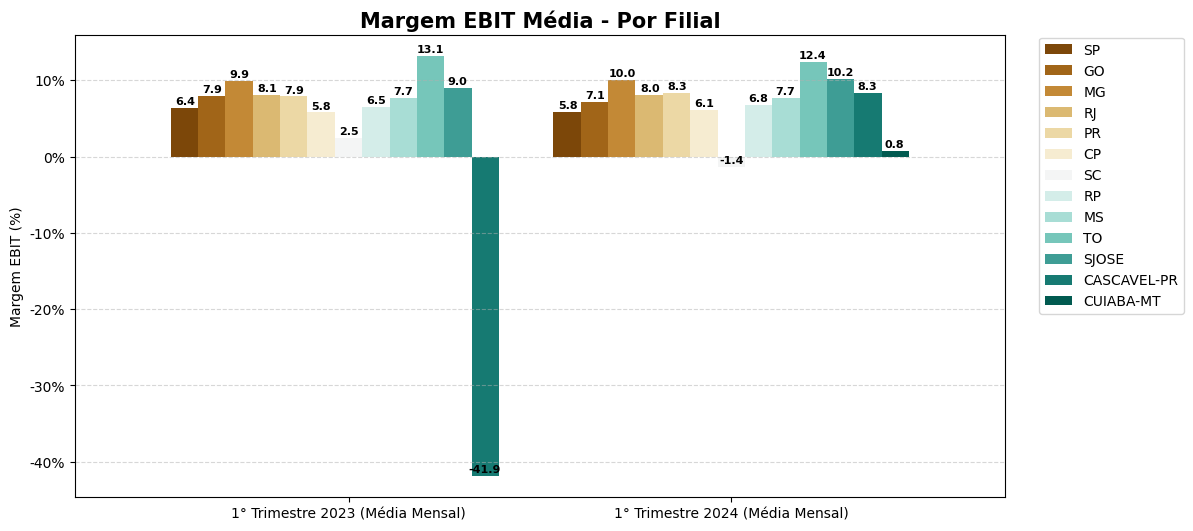

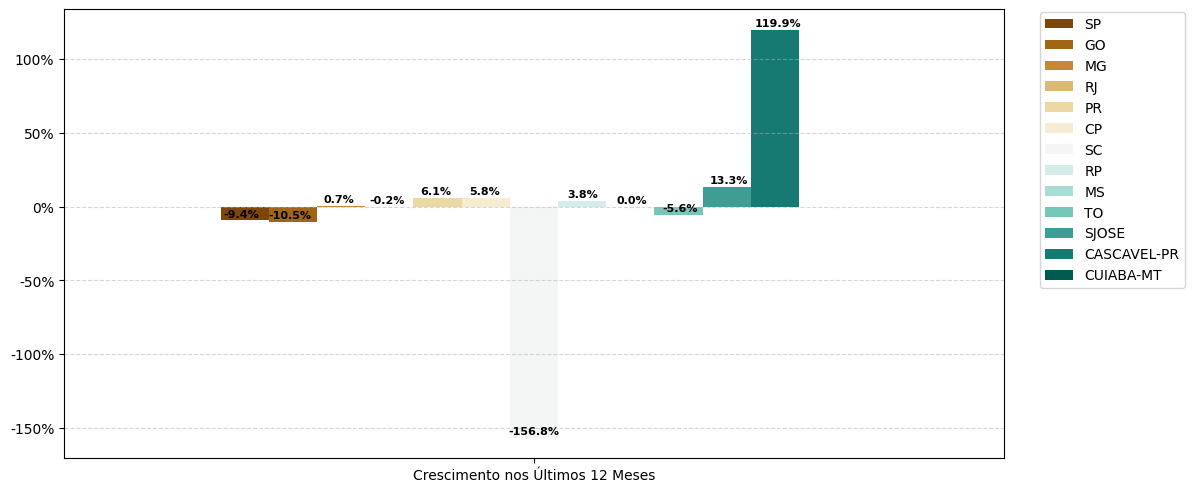

In [71]:
var1= "margem_ebit"
rotulo_y = 'Margem EBIT (%)'
titulo = 'Margem EBIT Média - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y *100):.0f}%'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()

# Lucro Líquido

Indicador    lucro_liquido                                               \
Filial                  SP             GO             MG             RJ   
1T-23(Média)      559076.0  229596.333333  435362.666667  214114.666667   
1T-24(Média)      582453.5  227010.500000  464259.500000  234070.500000   

Indicador                                                          \
Filial                   PR       CP            SC             RP   
1T-23(Média)  181919.666667  77338.0  29424.666667   96266.666667   
1T-24(Média)  155927.500000  83363.5 -10283.000000  117451.000000   

Indicador                                                                       
Filial                   MS        TO          SJOSE CASCAVEL-PR     CUIABA-MT  
1T-23(Média)  239957.333333  262743.0  110221.666667    -78766.0 -39291.666667  
1T-24(Média)  270805.000000  261139.0  163009.000000     59773.5  17060.500000  
Indicador      lucro_liquido                                          \
Filial                    

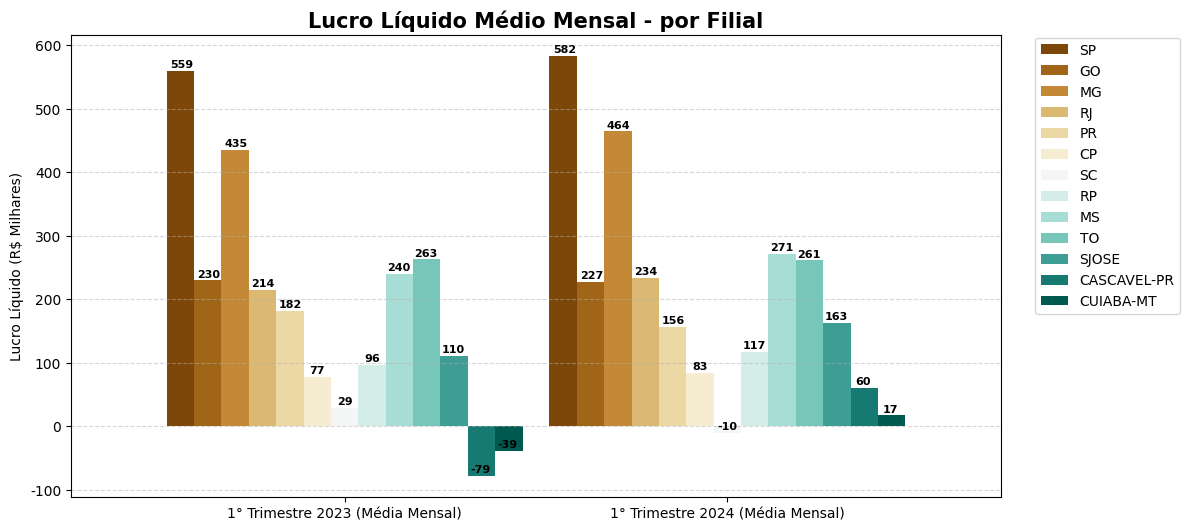

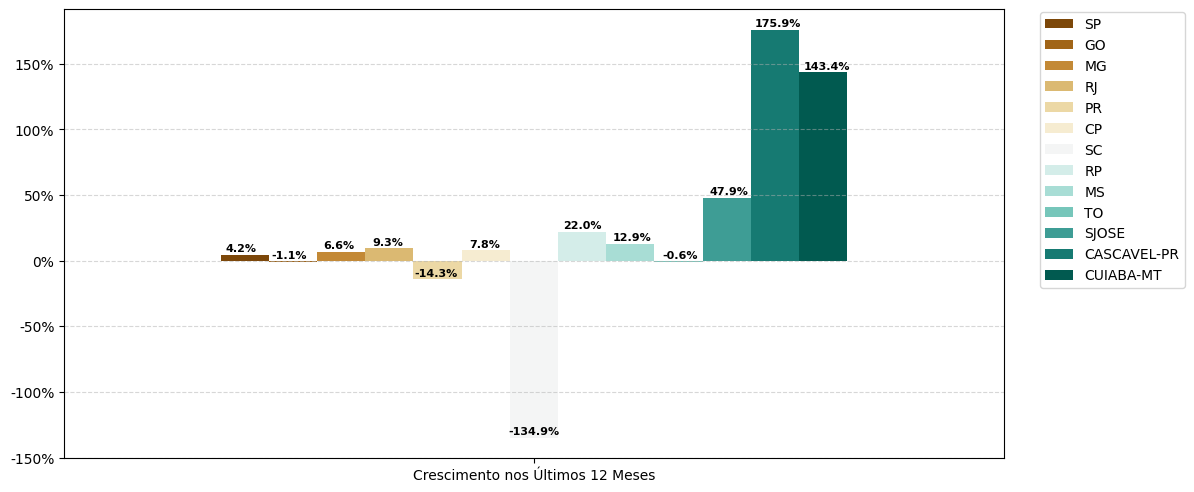

In [72]:
var1= "lucro_liquido"
rotulo_y = 'Lucro Líquido (R$ Milhares)'
titulo = 'Lucro Líquido Médio Mensal - por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
# df_filtrada_tri = df_filtrada_tri[df_filtrada_tri.Filial.isin(["GO","MG"])]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor/1000:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j  # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y/1000):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()



#Margem de Lucro

Indicador    margem_lucro                                                    \
Filial                 SP        GO        MG        RJ        PR        CP   
1T-23(Média)     0.033333  0.054667  0.069333  0.055333  0.054333  0.039667   
1T-24(Média)     0.031000  0.050500  0.071000  0.059000  0.062500  0.042500   

Indicador                                                                 \
Filial              SC        RP      MS        TO     SJOSE CASCAVEL-PR   
1T-23(Média)  0.018333  0.045333  0.0530  0.089333  0.063667   -0.277667   
1T-24(Média) -0.006500  0.047500  0.0555  0.087000  0.069000    0.058500   

Indicador               
Filial       CUIABA-MT  
1T-23(Média)       NaN  
1T-24(Média)    0.0115  
Indicador      margem_lucro                                                   \
Filial                   SP       GO        MG        RJ        PR        CP   
Crescimento_4T        -0.07 -0.07622  0.024038  0.066265  0.150307  0.071429   

Indicador                            

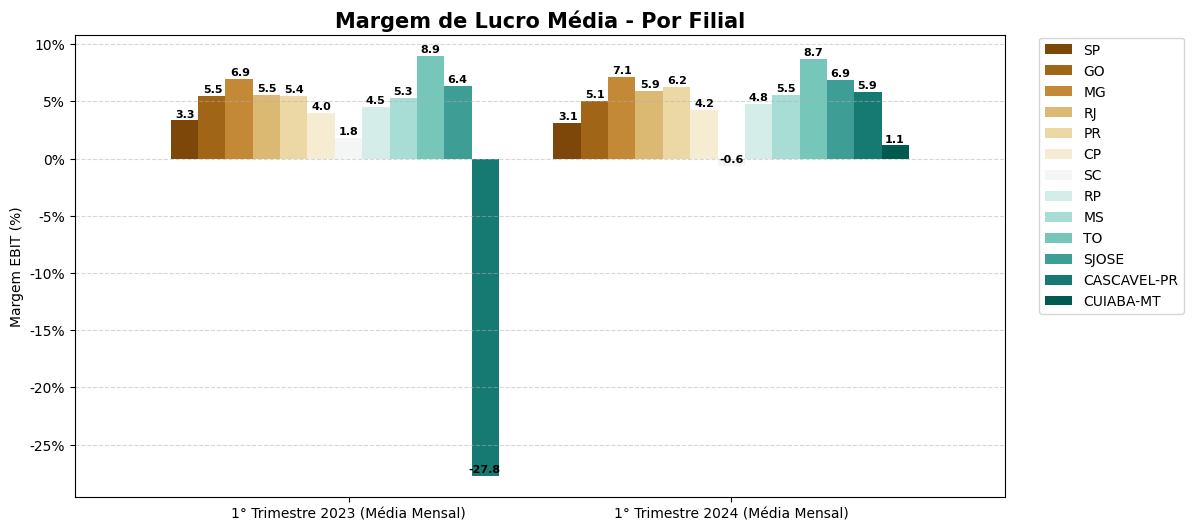

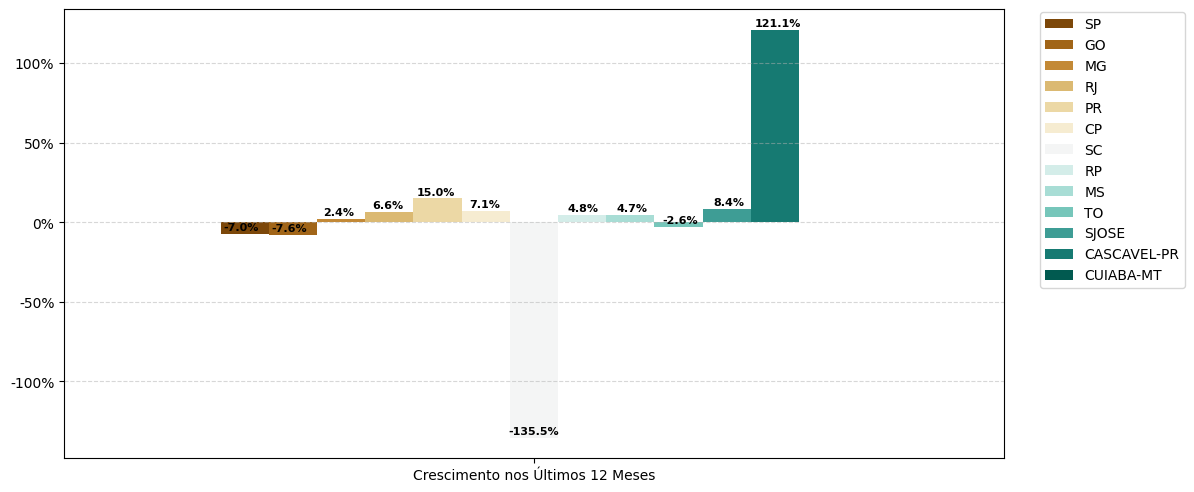

In [73]:
var1= "margem_lucro"
rotulo_y = 'Margem EBIT (%)'
titulo = 'Margem de Lucro Média - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
#estados_excluidos = ["CUIABA-MT"]  # Lista de estados a serem excluídos
#df_filtrada_tri = df_filtrada_tri[~df_filtrada_tri["Filial"].isin(estados_excluidos)]
#crescimento_tri = crescimento_tri[~crescimento_tri["Filial"].isin(estados_excluidos)]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor*100:.1f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y *100):.0f}%'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()

#Funcionários

Indicador    funcionarios                                               \
Filial                 SP         GO         MG    RJ         PR    CP   
1T-23(Média)   137.333333  24.666667  22.333333  22.0  19.666667  14.0   
1T-24(Média)   140.000000  26.000000  26.000000  22.0  20.000000  14.0   

Indicador                                                              \
Filial               SC         RP         MS    TO SJOSE CASCAVEL-PR   
1T-23(Média)  15.333333  15.333333  24.666667  17.0  13.0   14.333333   
1T-24(Média)  19.000000  15.000000  26.000000  16.0  15.0   13.500000   

Indicador                
Filial        CUIABA-MT  
1T-23(Média)   4.333333  
1T-24(Média)  14.000000  
Indicador      funcionarios                                                   \
Filial                   SP        GO        MG   RJ        PR   CP       SC   
Crescimento_4T     0.019417  0.054054  0.164179  0.0  0.016949  0.0  0.23913   

Indicador                                                        

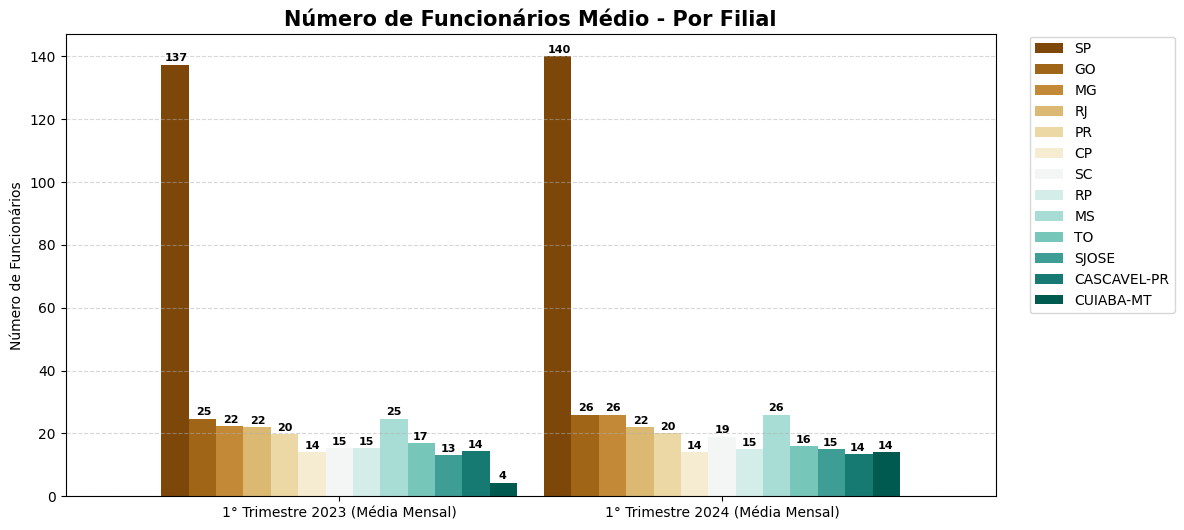

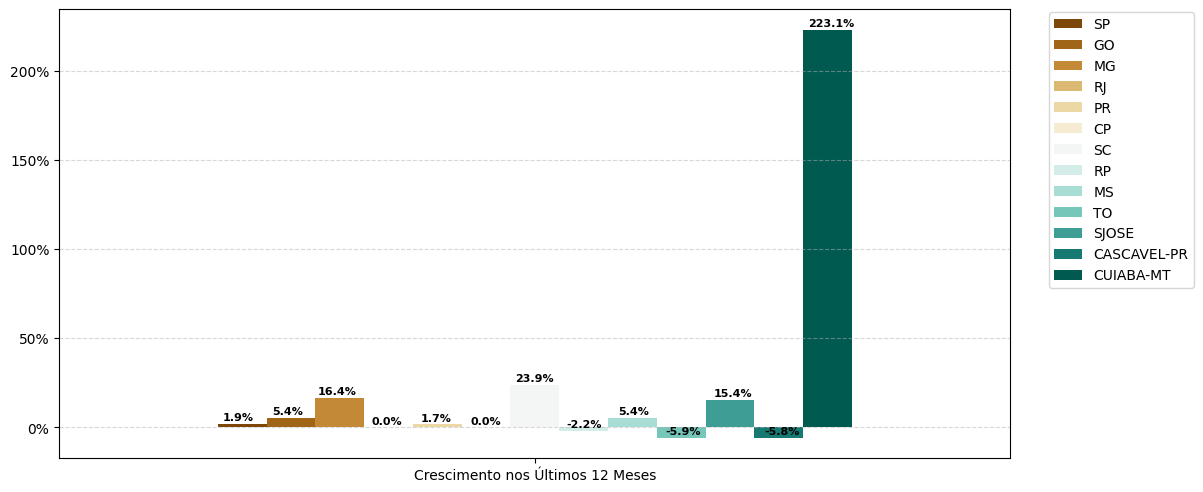

In [74]:
var1= "funcionarios"
rotulo_y = 'Número de Funcionários'
titulo = 'Número de Funcionários Médio - Por Filial'

# Filtrar linhas por indicador
df_filtrada = df_data[df_data.Indicador == var1]

# Selecionar apenas as colunas de média trimestral
df_filtrada_tri = df_filtrada.loc[:,['Filial','Indicador','1T-23(Média)','1T-24(Média)'] ]
crescimento_tri = df_filtrada.loc[:,['Filial','Indicador','Crescimento_4T'] ]

# Filtrar por filial
#estados_excluidos = ["CUIABA-MT"]  # Lista de estados a serem excluídos
#df_filtrada_tri = df_filtrada_tri[~df_filtrada_tri["Filial"].isin(estados_excluidos)]
#crescimento_tri = crescimento_tri[~crescimento_tri["Filial"].isin(estados_excluidos)]

# Transpor o DataFrame para facilitar plotar o gráfico
df_transposto = df_filtrada_tri.set_index(['Indicador', 'Filial']).transpose()
df_transposto_cresc = crescimento_tri.set_index(['Indicador', 'Filial']).transpose()
# Visualizar o resultado
print(df_transposto)
print(df_transposto_cresc)

# Escolher uma paleta de cores mais atraente
cores = sns.color_palette("BrBG", n_colors=13)

# Configurar os gráficos
ax = df_transposto.plot(kind='bar', figsize=(12, 6), color=cores, width=0.93)

ax2 = df_transposto_cresc.plot(kind='bar', figsize=(10.13, 6), color=cores, width=1.0)

# Adicionar valores de receita exatamente em cima das barras (gráfico de receita)
for i, coluna in enumerate(df_transposto.columns):
      for j, valor in enumerate(df_transposto[coluna]):
        if i == 0:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.071*(i-6)# Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.071*(i-6) # Ajuste o valor conforme necessário
          ax.annotate(f'{valor:.0f}', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Adicionar valores de receita exatamente em cima das barras (gráfico de crescimento)
for i, coluna in enumerate(df_transposto_cresc.columns):
      for j, valor in enumerate(df_transposto_cresc[coluna]):
        if i == 0:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 1:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 2:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')
        if i == 3:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 4:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 5:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 6:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 7:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 8:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 9:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 10:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 11:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

        if i == 12:
          x_pos = j +0.078*(i-6) # Ajuste o valor conforme necessário
          ax2.annotate(f'{valor*100:.1f}%', xy=(x_pos, valor),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', color='black', fontsize=8, fontweight='bold')

# Tornar rótulos mais descritivos
ax.set_ylabel(rotulo_y)
ax.set_title(titulo, fontsize=15,  fontweight='bold')

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar o layout
plt.tight_layout()

# Formatando números no eixo y
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{float(y):.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y * 100):.0f}%'))

# Criar rótulos personalizados para a legenda
rotulos_legenda = [filial for indicador, filial in df_transposto.columns]
rotulos_legenda2 = [filial for indicador, filial in df_transposto_cresc.columns]


# Atribuir rótulos à legenda
ax.legend(rotulos_legenda).set_bbox_to_anchor((1.20, 1.01))
ax2.legend(rotulos_legenda2).set_bbox_to_anchor((1.20, 1.01))

# Criar lista de rótulos personalizados
rotulos_eixo_x1 = ['1° Trimestre 2023 (Média Mensal)','1° Trimestre 2024 (Média Mensal)']
rotulos_eixo_x2 = ['Crescimento nos Últimos 12 Meses']

#Formatando eixo x
ax.set_xticklabels(rotulos_eixo_x1, rotation=0)
ax2.set_xticklabels(rotulos_eixo_x2, rotation=0)


# Mostrar os gráficos
plt.show()